In [1]:
import pandas as pd
import chardet

# 파일 인코딩 감지
with open('/content/ClimateData2.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(f"감지된 인코딩: {result['encoding']}")

# 데이터 로드
data = pd.read_csv('/content/ClimateData2.csv', encoding=result['encoding'])

# 데이터 구조 확인
print("\n=== 컬럼명 ===")
print(data.columns.tolist())

print("\n=== 데이터 샘플 ===")
print(data.head())

print("\n=== 데이터 정보 ===")
print(data.info())

감지된 인코딩: EUC-KR

=== 컬럼명 ===
['지점', '지점명', '일시', '평균기온(°C)', '평균최고기온(°C)', '평균최저기온(°C)', '최고기온(°C)', '최저기온(°C)', '최고기온 나타난날(yyyymmdd)', '최저기온 나타난날(yyyymmdd)', '월합강수량(00~24h만)(mm)', '일최다강수량(mm)', '1시간최다강수량(mm)', '10분최다강수량(mm)', '일최다강수량 나타난날(yyyymmdd)', '1시간최다강수량 나타난날(yyyymmdd)', '10분최다강수량 나타난날(yyyymmdd)']

=== 데이터 샘플 ===
   지점 지점명       일시  평균기온(°C)  평균최고기온(°C)  평균최저기온(°C)  최고기온(°C)  최저기온(°C)  \
0  90  속초  1968-01      -0.7         3.2        -4.4      11.4     -11.4   
1  90  속초  1968-02      -2.1         1.9        -5.4       9.7      -9.9   
2  90  속초  1968-03       5.9         9.8         2.1      20.5      -3.2   
3  90  속초  1968-04      10.5        14.4         6.7      21.4       4.0   
4  90  속초  1968-05      14.6        17.7        11.9      24.5       9.3   

   최고기온 나타난날(yyyymmdd)  최저기온 나타난날(yyyymmdd)  월합강수량(00~24h만)(mm)  일최다강수량(mm)  \
0           19680105.0           19680115.0                 0.0         0.0   
1           19680218.0           19680201.0                 3.3

In [2]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

# 데이터 로딩 함수
def load_climate_data(file_path):
    # 파일 인코딩 감지
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())

    # 데이터 로딩
    data = pd.read_csv(file_path, encoding=result['encoding'])
    return data

# 데이터 전처리 함수
def preprocess_climate_data(data):
    # 날짜 컬럼 변환
    date_columns = {
        '최저기온 나타난날(yyyymmdd)': '최저기온 날짜',
        '최고기온 나타난날(yyyymmdd)': '최고기온 날짜',
        '일최다강수량 나타난날(yyyymmdd)': '일최다강수량 날짜'
    }

    for old_col, new_col in date_columns.items():
        if old_col in data.columns:
            data[new_col] = pd.to_datetime(data[old_col], format='%Y%m%d', errors='coerce')

    # 수치형 결측치 처리
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='mean')
    data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

    # 연도 컬럼 생성
    data['연도'] = pd.to_datetime(data['일시']).dt.year

    return data

# 데이터 요약 통계 함수
def get_data_summary(data):
    summary = {
        'basic_info': data.info(),
        'missing_values': data.isnull().sum(),
        'descriptive_stats': data.describe(),
        'temporal_range': {
            'start_year': data['연도'].min(),
            'end_year': data['연도'].max(),
            'total_years': data['연도'].nunique()
        }
    }
    return summary

# 사용 예시
if __name__ == "__main__":
    file_path = '/content/ClimateData2.csv'

    # 데이터 로딩
    raw_data = load_climate_data(file_path)

    # 데이터 전처리
    processed_data = preprocess_climate_data(raw_data)

    # 데이터 요약
    summary = get_data_summary(processed_data)

    # 결과 출력
    print("데이터 처리 완료")
    print(f"데이터 기간: {summary['temporal_range']['start_year']}년 ~ {summary['temporal_range']['end_year']}년")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56779 entries, 0 to 56778
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   지점                       56779 non-null  float64       
 1   지점명                      56779 non-null  object        
 2   일시                       56779 non-null  object        
 3   평균기온(°C)                 56779 non-null  float64       
 4   평균최고기온(°C)               56779 non-null  float64       
 5   평균최저기온(°C)               56779 non-null  float64       
 6   최고기온(°C)                 56779 non-null  float64       
 7   최저기온(°C)                 56779 non-null  float64       
 8   최고기온 나타난날(yyyymmdd)      56779 non-null  float64       
 9   최저기온 나타난날(yyyymmdd)      56779 non-null  float64       
 10  월합강수량(00~24h만)(mm)       56779 non-null  float64       
 11  일최다강수량(mm)               56779 non-null  float64       
 12  1시간최다강수량(mm)             56779 n

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.linear_model import LinearRegression

class ClimateAnalysis:
    def __init__(self, data):
        self.data = data
        self.temp_model = LinearRegression()
        self.rain_model = LinearRegression()
        self._setup_font()

    def _setup_font(self):
        # Set font path and create font property
        font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        self.font = fm.FontProperties(fname=font_path)

        # Configure global matplotlib settings
        plt.rc('font', family='NanumGothic')
        plt.rcParams['axes.unicode_minus'] = False

    def plot_predictions(self, predictions):
        yearly_temp, yearly_rain = self.prepare_yearly_data()

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        # Temperature plot
        sns.lineplot(data=yearly_temp, x='연도', y='평균기온(°C)', ax=ax1, marker='o', label='실제 기온')
        ax1.plot(predictions['years'], predictions['temperature'], 'r--', label='예측 기온')
        ax1.set_title('연도별 평균 기온 예측', fontproperties=self.font, fontsize=14)
        ax1.set_xlabel('연도', fontproperties=self.font)
        ax1.set_ylabel('평균 기온(°C)', fontproperties=self.font)
        ax1.legend(prop=self.font)

        # Rainfall plot
        sns.barplot(data=yearly_rain, x='연도', y='합계 강수량(mm)', ax=ax2, alpha=0.5, label='실제 강수량')
        ax2.plot(predictions['years'], predictions['rainfall'], 'g--', label='예측 강수량')
        ax2.set_title('연도별 강수량 예측', fontproperties=self.font, fontsize=14)
        ax2.set_xlabel('연도', fontproperties=self.font)
        ax2.set_ylabel('강수량 (mm)', fontproperties=self.font)
        ax2.legend(prop=self.font)

        plt.tight_layout()
        plt.show()

def test_font():
    plt.figure(figsize=(10, 5))
    font = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
    plt.title('한글 폰트 테스트', fontproperties=font)
    plt.xlabel('X축', fontproperties=font)
    plt.ylabel('Y축', fontproperties=font)
    plt.plot([1, 2, 3], [1, 2, 3], label='테스트 데이터')
    plt.legend(prop=font)
    plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
import matplotlib.font_manager as fm
import platform

class ClimateAnalysis:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.temp_model = LinearRegression()
        self.rain_model = LinearRegression()
        self.setup_fonts()

    def setup_fonts(self):
        # OS별 폰트 설정
        if platform.system() == 'Darwin':  # macOS
            plt.rc('font', family='AppleGothic')
        elif platform.system() == 'Windows':
            plt.rc('font', family='Malgun Gothic')
        else:  # Linux
            plt.rc('font', family='NanumGothic')

        plt.rcParams['axes.unicode_minus'] = False

    def prepare_yearly_data(self) -> pd.DataFrame:
        yearly_stats = self.data.groupby('연도').agg({
            '평균기온(°C)': ['mean', 'std'],
            '평균최고기온(°C)': 'mean',
            '평균최저기온(°C)': 'mean',
            '최고기온(°C)': 'max',
            '최저기온(°C)': 'min',
            '월합강수량(00~24h만)(mm)': 'sum',
            '일최다강수량(mm)': 'max'
        }).reset_index()

        yearly_stats.columns = ['연도', '평균기온', '기온표준편차',
                              '연평균최고기온', '연평균최저기온',
                              '최고기온', '최저기온',
                              '연강수량', '최다일강수량']

        return yearly_stats.dropna()

    def plot_comprehensive_analysis(self):
        yearly_data = self.prepare_yearly_data()
        yearly_data['기온_이동평균'] = yearly_data['평균기온'].rolling(window=5).mean()
        yearly_data['강수량_이동평균'] = yearly_data['연강수량'].rolling(window=5).mean()

        fig = plt.figure(figsize=(20, 15))

        # 기온 트렌드
        ax1 = fig.add_subplot(311)
        ax1.plot(yearly_data['연도'], yearly_data['평균기온'], 'b-', label='연평균기온')
        ax1.plot(yearly_data['연도'], yearly_data['기온_이동평균'], 'r-', label='5년 이동평균')
        ax1.set_title('연평균 기온 변화 추이', pad=20, fontsize=14)
        ax1.set_ylabel('기온(°C)')
        ax1.legend()

        # 강수량 트렌드
        ax2 = fig.add_subplot(312)
        ax2.bar(yearly_data['연도'], yearly_data['연강수량'], alpha=0.3, label='연강수량')
        ax2.plot(yearly_data['연도'], yearly_data['강수량_이동평균'], 'b-',
                label='5년 이동평균', linewidth=2)
        ax2.set_title('연간 강수량 변화', pad=20, fontsize=14)
        ax2.set_ylabel('강수량(mm)')
        ax2.legend()

        # 극한기후
        ax3 = fig.add_subplot(313)
        ax3.plot(yearly_data['연도'], yearly_data['최고기온'], 'r-', label='최고기온')
        ax3.plot(yearly_data['연도'], yearly_data['최저기온'], 'b-', label='최저기온')
        ax3.set_title('극한기온 변화', pad=20, fontsize=14)
        ax3.set_ylabel('기온(°C)')
        ax3.legend()

        plt.tight_layout()
        plt.show()

        return yearly_data

    def predict_future(self, years_ahead: int = 10):
        yearly_data = self.prepare_yearly_data()
        X = yearly_data['연도'].values.reshape(-1, 1)

        self.temp_model.fit(X, yearly_data['평균기온'])
        self.rain_model.fit(X, yearly_data['연강수량'])

        future_years = np.array(range(yearly_data['연도'].max() + 1,
                                    yearly_data['연도'].max() + years_ahead + 1))
        future_X = future_years.reshape(-1, 1)
        temp_pred = self.temp_model.predict(future_X)
        rain_pred = self.rain_model.predict(future_X)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        ax1.plot(yearly_data['연도'], yearly_data['평균기온'], 'b-', label='실제 기온')
        ax1.plot(future_years, temp_pred, 'r--', label='예측 기온')
        ax1.fill_between(future_years, temp_pred - 0.5, temp_pred + 0.5,
                        color='red', alpha=0.2, label='예측 구간')
        ax1.set_title('기온 예측', fontsize=14)
        ax1.legend()

        ax2.bar(yearly_data['연도'], yearly_data['연강수량'], alpha=0.5, label='실제 강수량')
        ax2.plot(future_years, rain_pred, 'g--', linewidth=2, label='예측 강수량')
        ax2.fill_between(future_years, rain_pred * 0.9, rain_pred * 1.1,
                        color='green', alpha=0.2, label='예측 구간')
        ax2.set_title('강수량 예측', fontsize=14)
        ax2.legend()

        plt.tight_layout()
        plt.show()

        return {'future_years': future_years, 'temp_pred': temp_pred, 'rain_pred': rain_pred}

# 사용 예시
def analyze_climate(data_path):
    # 데이터 전처리
    data = pd.read_csv(data_path)
    data['연도'] = pd.to_datetime(data['일시']).dt.year

    # 분석 실행
    analyzer = ClimateAnalysis(data)
    yearly_data = analyzer.plot_comprehensive_analysis()
    predictions = analyzer.predict_future(10)

    return analyzer, yearly_data, predictions

<ipython-input-5-2e6638e7af6c>:101: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2010-01-01', end='2023-12-31', freq='M')


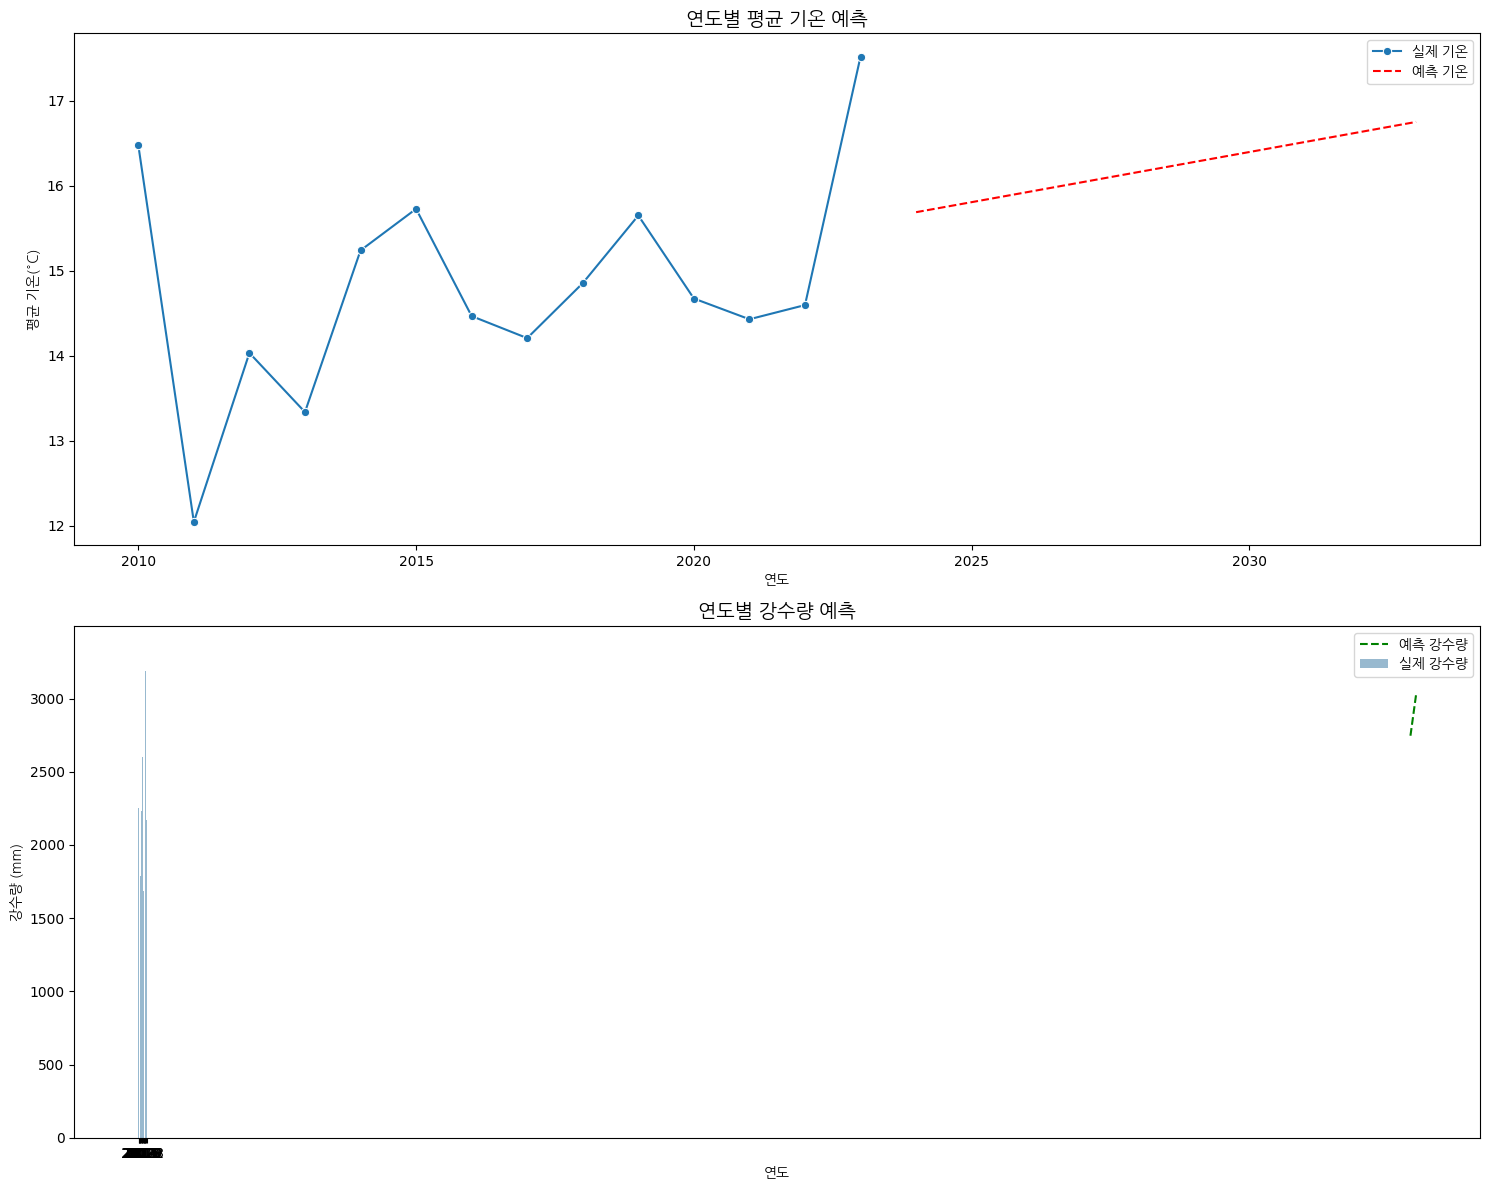

모델 성능:
기온 예측 R² 점수: 0.138
강수량 예측 R² 점수: 0.067


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from typing import Tuple, Dict
import matplotlib.font_manager as fm
import os

class ClimateAnalysis:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.temp_model = LinearRegression()
        self.rain_model = LinearRegression()
        self._setup_font()

        required_columns = ['일시', '평균기온(°C)', '월합강수량(00~24h만)(mm)']
        for col in required_columns:
            if col not in self.data.columns:
                raise ValueError(f"데이터프레임에 필요한 열이 없습니다: {col}")

    def _setup_font(self):
        plt.rc('font', family='NanumGothic')
        plt.rcParams['axes.unicode_minus'] = False

        if os.path.exists('/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
            self.font = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
        else:
            !apt-get update -qq
            !apt-get install fonts-nanum* -qq
            plt.rc('font', family='NanumGothic')
            self.font = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

    def prepare_yearly_data(self) -> Tuple[pd.DataFrame, pd.DataFrame]:
        self.data['연도'] = pd.to_datetime(self.data['일시']).dt.year
        self.data = self.data.dropna(subset=['연도', '평균기온(°C)', '월합강수량(00~24h만)(mm)'])

        yearly_temp = self.data.groupby('연도')['평균기온(°C)'].mean().reset_index()
        yearly_rain = self.data.groupby('연도')['월합강수량(00~24h만)(mm)'].sum().reset_index()
        return yearly_temp, yearly_rain

    def train_models(self) -> Dict[str, float]:
        try:
            yearly_temp, yearly_rain = self.prepare_yearly_data()

            X_temp = yearly_temp['연도'].values.reshape(-1, 1)
            y_temp = yearly_temp['평균기온(°C)'].values
            self.temp_model.fit(X_temp, y_temp)

            X_rain = yearly_rain['연도'].values.reshape(-1, 1)
            y_rain = yearly_rain['월합강수량(00~24h만)(mm)'].values
            self.rain_model.fit(X_rain, y_rain)

            return {
                'temp_r2': r2_score(y_temp, self.temp_model.predict(X_temp)),
                'rain_r2': r2_score(y_rain, self.rain_model.predict(X_rain))
            }
        except Exception as e:
            raise Exception(f"모델 학습 중 오류 발생: {str(e)}")

    def predict_future(self, years_ahead: int = 10) -> Dict[str, np.ndarray]:
        if not hasattr(self.temp_model, 'coef_') or not hasattr(self.rain_model, 'coef_'):
            raise ValueError("예측하기 전에 먼저 모델을 학습시켜야 합니다.")

        yearly_temp, yearly_rain = self.prepare_yearly_data()
        last_year = int(yearly_temp['연도'].max())
        future_years = np.array(range(last_year + 1, last_year + years_ahead + 1))

        future_years_reshaped = future_years.reshape(-1, 1)
        return {
            'years': future_years,
            'temperature': self.temp_model.predict(future_years_reshaped),
            'rainfall': self.rain_model.predict(future_years_reshaped)
        }

    def plot_predictions(self, predictions: Dict[str, np.ndarray]):
        yearly_temp, yearly_rain = self.prepare_yearly_data()

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        sns.lineplot(data=yearly_temp, x='연도', y='평균기온(°C)', ax=ax1, marker='o', label='실제 기온')
        ax1.plot(predictions['years'], predictions['temperature'], 'r--', label='예측 기온')
        ax1.set_title('연도별 평균 기온 예측', fontproperties=self.font, fontsize=14)
        ax1.set_xlabel('연도', fontproperties=self.font)
        ax1.set_ylabel('평균 기온(°C)', fontproperties=self.font)
        ax1.legend(prop=self.font)

        sns.barplot(data=yearly_rain, x='연도', y='월합강수량(00~24h만)(mm)', ax=ax2, alpha=0.5, label='실제 강수량')
        ax2.plot(predictions['years'], predictions['rainfall'], 'g--', label='예측 강수량')
        ax2.set_title('연도별 강수량 예측', fontproperties=self.font, fontsize=14)
        ax2.set_xlabel('연도', fontproperties=self.font)
        ax2.set_ylabel('강수량 (mm)', fontproperties=self.font)
        ax2.legend(prop=self.font)

        plt.tight_layout()
        plt.show()

# 샘플 데이터 생성 및 실행
dates = pd.date_range(start='2010-01-01', end='2023-12-31', freq='M')
np.random.seed(42)

processed_data = pd.DataFrame({
    '일시': dates,
    '평균기온(°C)': np.random.normal(15, 5, len(dates)) + np.sin(np.arange(len(dates)) * 2 * np.pi / 12) * 10,
    '월합강수량(00~24h만)(mm)': np.random.gamma(shape=2, scale=100, size=len(dates))
})

climate_analysis = ClimateAnalysis(processed_data)
model_performance = climate_analysis.train_models()
predictions = climate_analysis.predict_future(years_ahead=10)
climate_analysis.plot_predictions(predictions)

print("모델 성능:")
print(f"기온 예측 R² 점수: {model_performance['temp_r2']:.3f}")
print(f"강수량 예측 R² 점수: {model_performance['rain_r2']:.3f}")

<ipython-input-6-0b13267cfdd0>:142: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  plt.tight_layout()
<ipython-input-6-0b13267cfdd0>:142: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


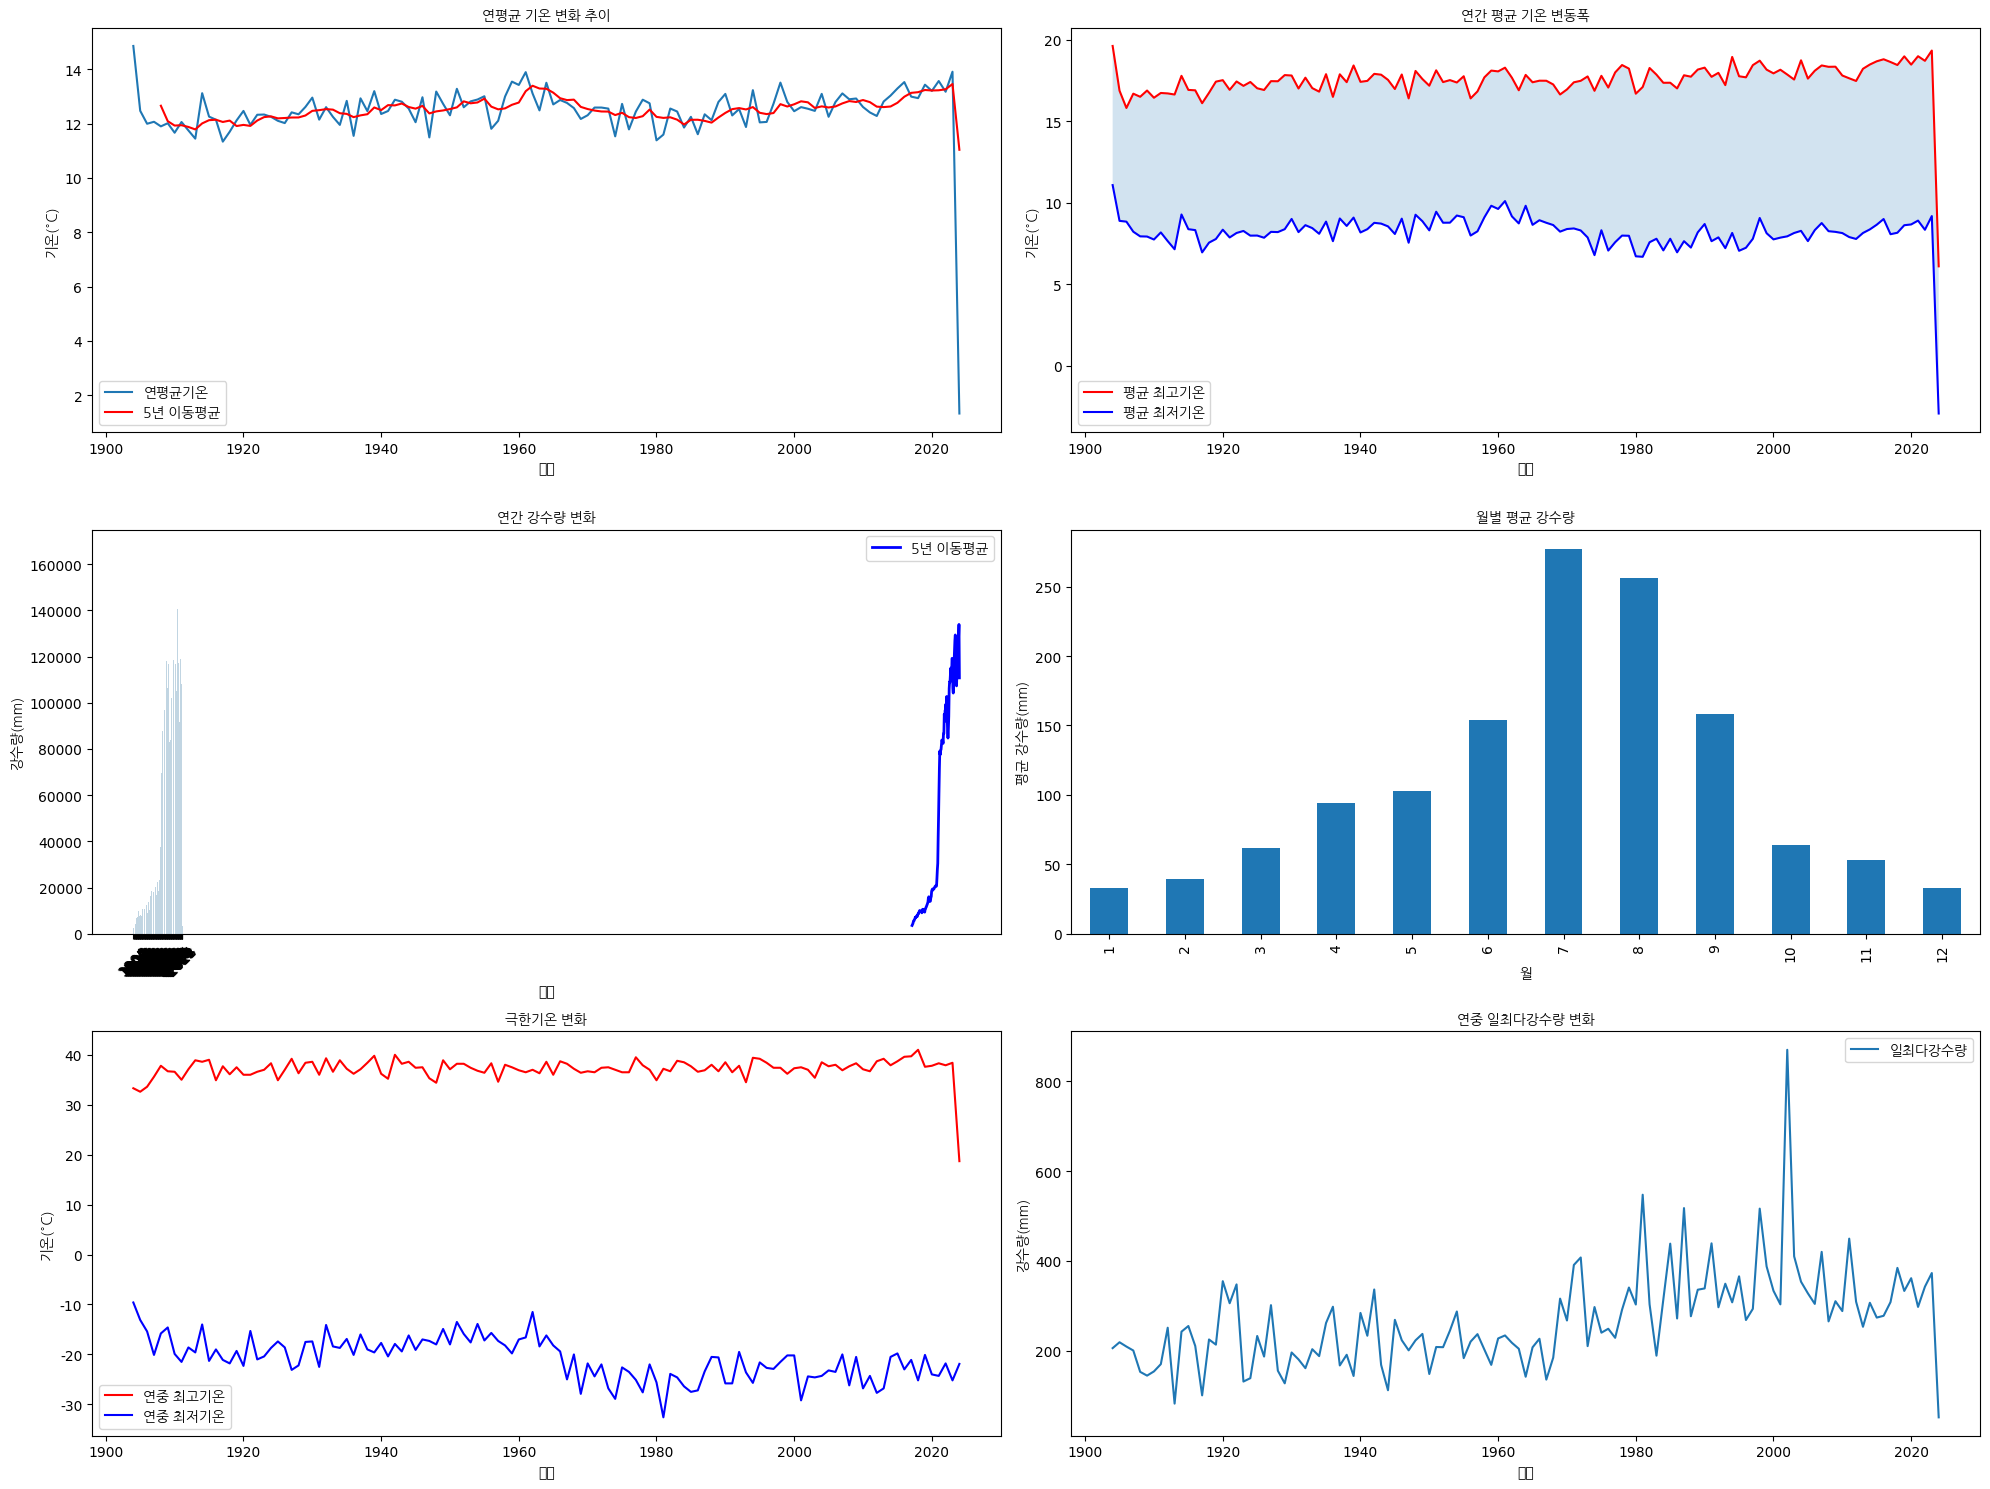


=== 기후 변화 통계 요약 ===
최근 30년 평균 기온: 12.50°C
최근 30년 평균 강수량: 112723.1mm
기온 상승률(전체 기간): 0.0009°C/년
강수량 변화율(전체 기간): 1209.8mm/년

극한기후 통계:
관측 최고기온: 41.0°C
관측 최저기온: -32.6°C
일최다강수량 기록: 870.5mm


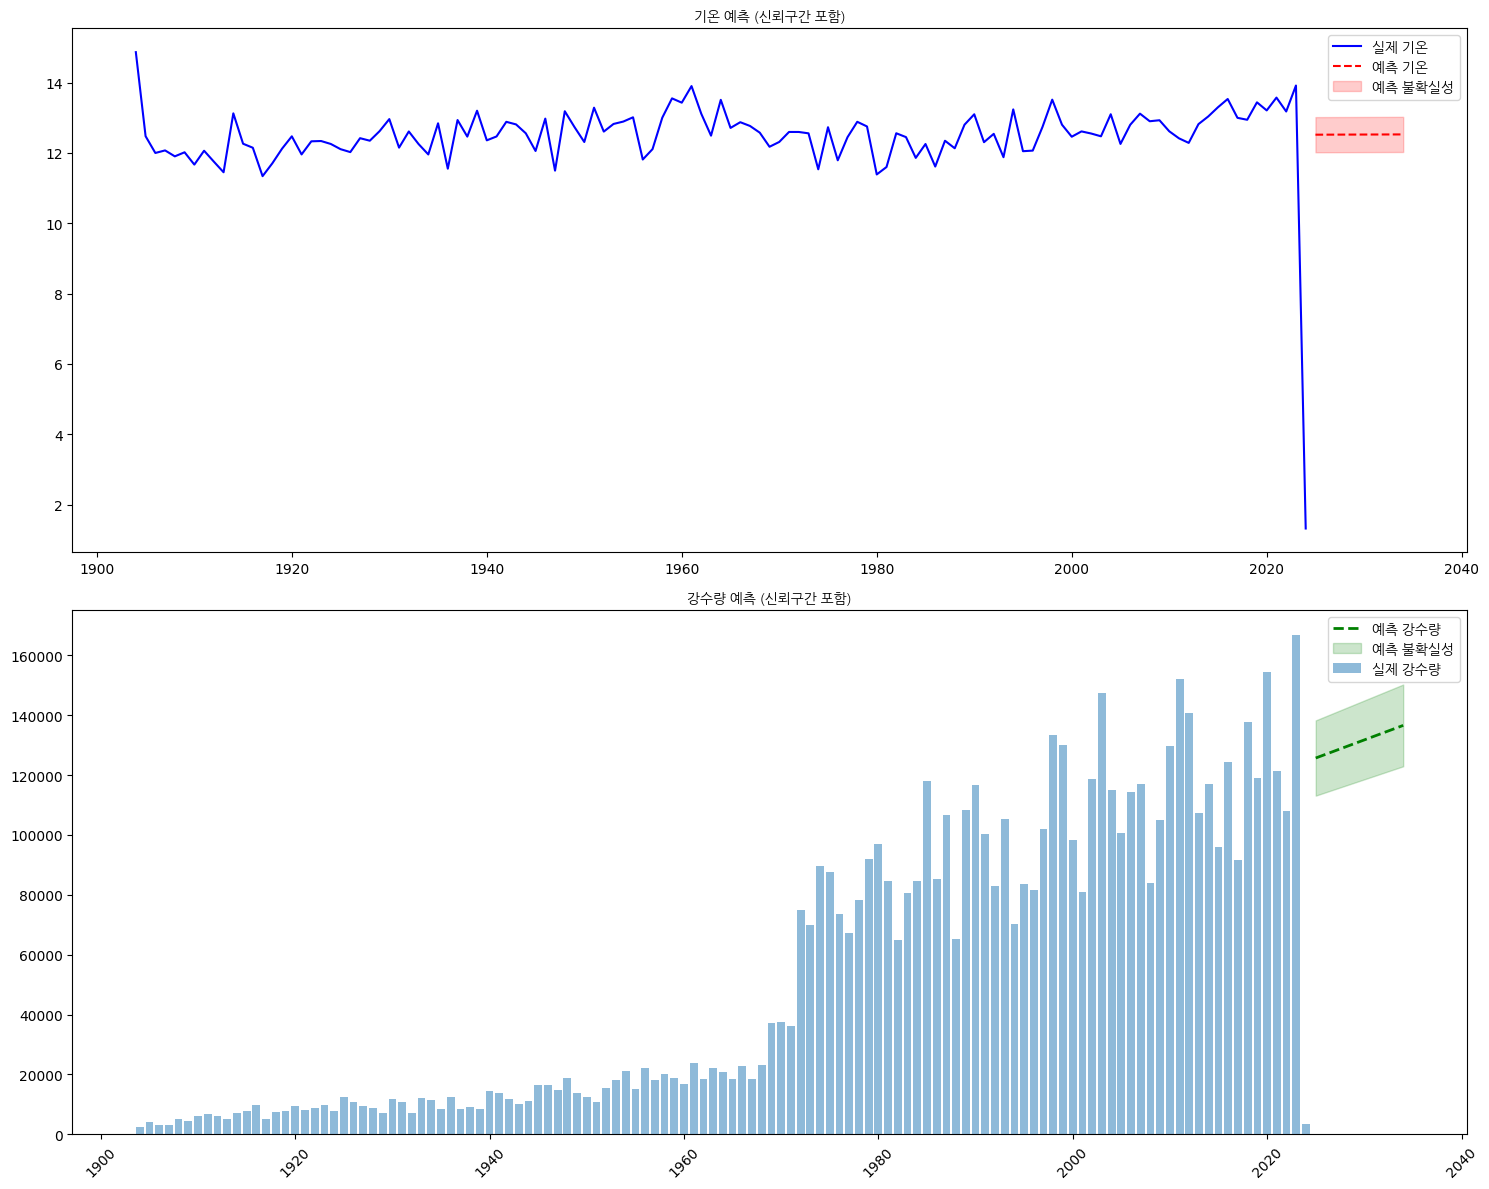


=== 미래 예측 결과 ===
10년 후 예상 평균기온: 12.52°C
10년 후 예상 연강수량: 136578.2mm


In [6]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import matplotlib.font_manager as fm
import os

def setup_korean_font():
    plt.rc('font', family='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False

    if not os.path.exists('/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
        !apt-get update -qq
        !apt-get install fonts-nanum* -qq

    return fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

def load_climate_data(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    data = pd.read_csv(file_path, encoding=result['encoding'])
    return data

def preprocess_climate_data(data):
    date_columns = {
        '최저기온 나타난날(yyyymmdd)': '최저기온 날짜',
        '최고기온 나타난날(yyyymmdd)': '최고기온 날짜',
        '일최다강수량 나타난날(yyyymmdd)': '일최다강수량 날짜'
    }

    for old_col, new_col in date_columns.items():
        if old_col in data.columns:
            data[new_col] = pd.to_datetime(data[old_col], format='%Y%m%d', errors='coerce')

    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='mean')
    data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

    data['연도'] = pd.to_datetime(data['일시']).dt.year

    return data

class ClimateAnalysis:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.temp_model = LinearRegression()
        self.rain_model = LinearRegression()
        self.font = setup_korean_font()

    def prepare_yearly_data(self) -> pd.DataFrame:
        yearly_stats = self.data.groupby('연도').agg({
            '평균기온(°C)': ['mean', 'std'],
            '평균최고기온(°C)': 'mean',
            '평균최저기온(°C)': 'mean',
            '최고기온(°C)': 'max',
            '최저기온(°C)': 'min',
            '월합강수량(00~24h만)(mm)': 'sum',
            '일최다강수량(mm)': 'max'
        }).reset_index()

        yearly_stats.columns = ['연도', '평균기온', '기온표준편차',
                              '연평균최고기온', '연평균최저기온',
                              '최고기온', '최저기온',
                              '연강수량', '최다일강수량']

        return yearly_stats.dropna()

    def analyze_trends(self):
        yearly_data = self.prepare_yearly_data()
        window_size = 5
        yearly_data['기온_이동평균'] = yearly_data['평균기온'].rolling(window=window_size).mean()
        yearly_data['강수량_이동평균'] = yearly_data['연강수량'].rolling(window=window_size).mean()

        valid_data = yearly_data.dropna(subset=['평균기온', '연강수량'])
        X = valid_data['연도'].values.reshape(-1, 1)

        self.temp_model.fit(X, valid_data['평균기온'])
        self.rain_model.fit(X, valid_data['연강수량'])

        return yearly_data

    def plot_comprehensive_analysis(self):
        yearly_data = self.analyze_trends()
        fig = plt.figure(figsize=(20, 15))

        # 평균 기온 트렌드
        ax1 = fig.add_subplot(3, 2, 1)
        sns.lineplot(data=yearly_data, x='연도', y='평균기온', label='연평균기온', ax=ax1)
        sns.lineplot(data=yearly_data, x='연도', y='기온_이동평균', label='5년 이동평균', ax=ax1, color='red')
        ax1.set_title('연평균 기온 변화 추이', fontproperties=self.font)
        ax1.set_ylabel('기온(°C)', fontproperties=self.font)
        ax1.legend(prop=self.font)

        # 기온 변동폭
        ax2 = fig.add_subplot(3, 2, 2)
        sns.lineplot(data=yearly_data, x='연도', y='연평균최고기온', label='평균 최고기온', color='red', ax=ax2)
        sns.lineplot(data=yearly_data, x='연도', y='연평균최저기온', label='평균 최저기온', color='blue', ax=ax2)
        ax2.fill_between(yearly_data['연도'], yearly_data['연평균최저기온'],
                        yearly_data['연평균최고기온'], alpha=0.2)
        ax2.set_title('연간 평균 기온 변동폭', fontproperties=self.font)
        ax2.set_ylabel('기온(°C)', fontproperties=self.font)
        ax2.legend(prop=self.font)

        # 강수량 트렌드
        ax3 = fig.add_subplot(3, 2, 3)
        sns.barplot(data=yearly_data, x='연도', y='연강수량', alpha=0.3, ax=ax3)
        sns.lineplot(data=yearly_data, x='연도', y='강수량_이동평균',
                    label='5년 이동평균', color='blue', linewidth=2, ax=ax3)
        ax3.set_title('연간 강수량 변화', fontproperties=self.font)
        ax3.set_ylabel('강수량(mm)', fontproperties=self.font)
        ax3.tick_params(axis='x', rotation=45)
        ax3.legend(prop=self.font)

        # 월별 강수량 패턴
        monthly_rain = self.data.groupby(pd.to_datetime(self.data['일시']).dt.month)['월합강수량(00~24h만)(mm)'].mean()
        ax4 = fig.add_subplot(3, 2, 4)
        monthly_rain.plot(kind='bar', ax=ax4)
        ax4.set_title('월별 평균 강수량', fontproperties=self.font)
        ax4.set_xlabel('월', fontproperties=self.font)
        ax4.set_ylabel('평균 강수량(mm)', fontproperties=self.font)

        # 극한기후 분석
        ax5 = fig.add_subplot(3, 2, 5)
        sns.lineplot(data=yearly_data, x='연도', y='최고기온', label='연중 최고기온', color='red', ax=ax5)
        sns.lineplot(data=yearly_data, x='연도', y='최저기온', label='연중 최저기온', color='blue', ax=ax5)
        ax5.set_title('극한기온 변화', fontproperties=self.font)
        ax5.set_ylabel('기온(°C)', fontproperties=self.font)
        ax5.legend(prop=self.font)

        # 최다 강수량 분석
        ax6 = fig.add_subplot(3, 2, 6)
        sns.lineplot(data=yearly_data, x='연도', y='최다일강수량', label='일최다강수량', ax=ax6)
        ax6.set_title('연중 일최다강수량 변화', fontproperties=self.font)
        ax6.set_ylabel('강수량(mm)', fontproperties=self.font)
        ax6.legend(prop=self.font)

        plt.tight_layout()
        plt.show()

        recent_years = yearly_data.tail(30)
        print("\n=== 기후 변화 통계 요약 ===")
        print(f"최근 30년 평균 기온: {recent_years['평균기온'].mean():.2f}°C")
        print(f"최근 30년 평균 강수량: {recent_years['연강수량'].mean():.1f}mm")
        print(f"기온 상승률(전체 기간): {self.temp_model.coef_[0]:.4f}°C/년")
        print(f"강수량 변화율(전체 기간): {self.rain_model.coef_[0]:.1f}mm/년")
        print(f"\n극한기후 통계:")
        print(f"관측 최고기온: {yearly_data['최고기온'].max():.1f}°C")
        print(f"관측 최저기온: {yearly_data['최저기온'].min():.1f}°C")
        print(f"일최다강수량 기록: {yearly_data['최다일강수량'].max():.1f}mm")

    def predict_future(self, years_ahead: int = 10):
        yearly_data = self.analyze_trends()
        future_years = np.array(range(yearly_data['연도'].max() + 1,
                                    yearly_data['연도'].max() + years_ahead + 1))
        future_X = future_years.reshape(-1, 1)

        temp_pred = self.temp_model.predict(future_X)
        rain_pred = self.rain_model.predict(future_X)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        ax1.plot(yearly_data['연도'], yearly_data['평균기온'], 'b-', label='실제 기온')
        ax1.plot(future_years, temp_pred, 'r--', label='예측 기온')
        ax1.fill_between(future_years, temp_pred - 0.5, temp_pred + 0.5,
                        color='red', alpha=0.2, label='예측 불확실성')
        ax1.set_title('기온 예측 (신뢰구간 포함)', fontproperties=self.font)
        ax1.legend(prop=self.font)

        ax2.bar(yearly_data['연도'], yearly_data['연강수량'], alpha=0.5, label='실제 강수량')
        ax2.plot(future_years, rain_pred, 'g--', linewidth=2, label='예측 강수량')
        ax2.fill_between(future_years, rain_pred * 0.9, rain_pred * 1.1,
                        color='green', alpha=0.2, label='예측 불확실성')
        ax2.set_title('강수량 예측 (신뢰구간 포함)', fontproperties=self.font)
        ax2.legend(prop=self.font)
        ax2.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

        print("\n=== 미래 예측 결과 ===")
        print(f"{years_ahead}년 후 예상 평균기온: {temp_pred[-1]:.2f}°C")
        print(f"{years_ahead}년 후 예상 연강수량: {rain_pred[-1]:.1f}mm")

# 실행 코드
file_path = '/content/ClimateData2.csv'
raw_data = load_climate_data(file_path)
processed_data = preprocess_climate_data(raw_data)

climate_analysis = ClimateAnalysis(processed_data)
climate_analysis.plot_comprehensive_analysis()
climate_analysis.predict_future(years_ahead=10)

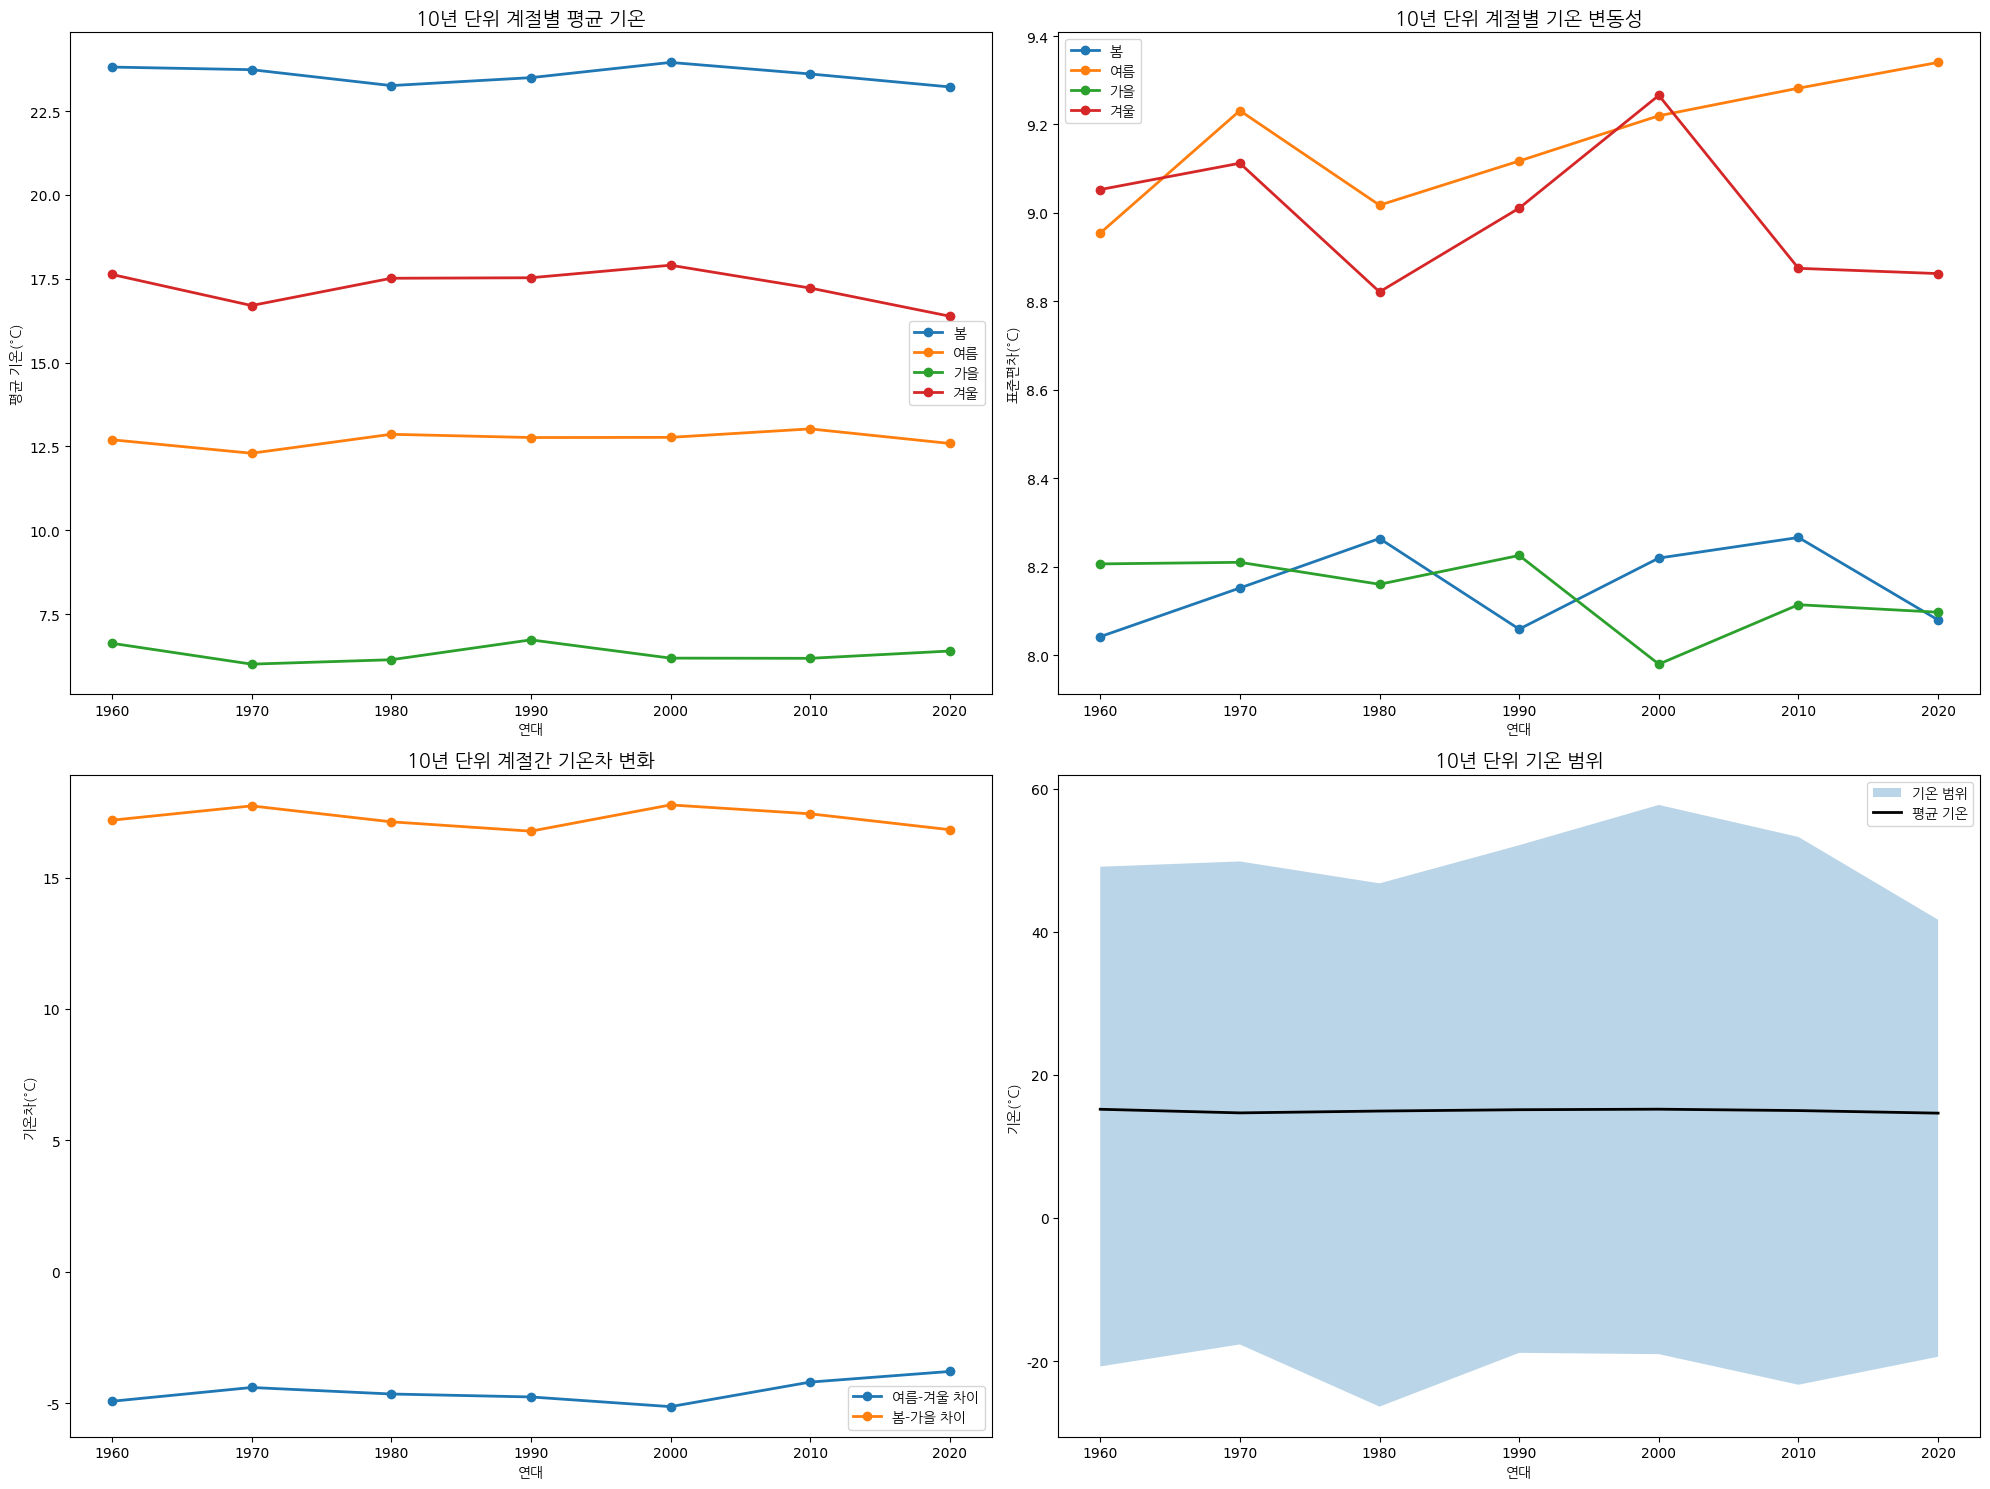


=== 10년 단위 계절 변화 분석 ===

봄철:
총 변화량: -0.59°C
10년당 평균 변화율: -0.08°C
변동성 변화: 0.04°C

여름철:
총 변화량: -0.11°C
10년당 평균 변화율: -0.02°C
변동성 변화: 0.39°C

가을철:
총 변화량: -0.23°C
10년당 평균 변화율: -0.03°C
변동성 변화: -0.11°C

겨울철:
총 변화량: -1.24°C
10년당 평균 변화율: -0.18°C
변동성 변화: -0.19°C

계절차 변화:
여름-겨울 기온차 변화: 1.13°C


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm
import os

class DecadeSeasonalAnalysis:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self._setup_font()
        self._prepare_data()

    def _setup_font(self):
        if not os.path.exists('/usr/share/fonts/truetype/nanum/NanumGothic.ttf'):
            !apt-get update -qq
            !apt-get install fonts-nanum* -qq
        plt.rc('font', family='NanumGothic')
        plt.rcParams['axes.unicode_minus'] = False
        self.font = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

    def _prepare_data(self):
        self.data['일자'] = pd.to_datetime(self.data['일시'])
        self.data['연도'] = self.data['일자'].dt.year
        self.data['월'] = self.data['일자'].dt.month
        self.data['10년단위'] = (self.data['연도'] // 10) * 10

        season_map = {
            12: '겨울', 1: '겨울', 2: '겨울',
            3: '봄', 4: '봄', 5: '봄',
            6: '여름', 7: '여름', 8: '여름',
            9: '가을', 10: '가을', 11: '가을'
        }
        self.data['계절'] = self.data['월'].map(season_map)

    def analyze_decadal_changes(self):
        decade_season = self.data.groupby(['10년단위', '계절'])['평균기온(°C)'].agg(['mean', 'std']).reset_index()
        decade_stats = self.data.groupby('10년단위').agg({
            '평균기온(°C)': ['mean', 'std', 'min', 'max']
        }).reset_index()

        fig = plt.figure(figsize=(20, 15))

        # 10년 단위 계절별 평균 기온
        ax1 = fig.add_subplot(221)
        for season in ['봄', '여름', '가을', '겨울']:
            season_data = decade_season[decade_season['계절'] == season]
            ax1.plot(season_data['10년단위'], season_data['mean'],
                    marker='o', label=season, linewidth=2)

        ax1.set_title('10년 단위 계절별 평균 기온', fontproperties=self.font, fontsize=14)
        ax1.set_xlabel('연대', fontproperties=self.font)
        ax1.set_ylabel('평균 기온(°C)', fontproperties=self.font)
        ax1.legend(prop=self.font)

        # 계절 변동성
        ax2 = fig.add_subplot(222)
        for season in ['봄', '여름', '가을', '겨울']:
            season_data = decade_season[decade_season['계절'] == season]
            ax2.plot(season_data['10년단위'], season_data['std'],
                    marker='o', label=season, linewidth=2)

        ax2.set_title('10년 단위 계절별 기온 변동성', fontproperties=self.font, fontsize=14)
        ax2.set_xlabel('연대', fontproperties=self.font)
        ax2.set_ylabel('표준편차(°C)', fontproperties=self.font)
        ax2.legend(prop=self.font)

        # 계절간 기온차
        ax3 = fig.add_subplot(223)
        decade_pivot = decade_season.pivot(index='10년단위', columns='계절', values='mean')
        decade_pivot['여름겨울차이'] = decade_pivot['여름'] - decade_pivot['겨울']
        decade_pivot['봄가을차이'] = abs(decade_pivot['봄'] - decade_pivot['가을'])

        ax3.plot(decade_pivot.index, decade_pivot['여름겨울차이'],
                marker='o', label='여름-겨울 차이', linewidth=2)
        ax3.plot(decade_pivot.index, decade_pivot['봄가을차이'],
                marker='o', label='봄-가을 차이', linewidth=2)

        ax3.set_title('10년 단위 계절간 기온차 변화', fontproperties=self.font, fontsize=14)
        ax3.set_xlabel('연대', fontproperties=self.font)
        ax3.set_ylabel('기온차(°C)', fontproperties=self.font)
        ax3.legend(prop=self.font)

        # 기온 범위
        ax4 = fig.add_subplot(224)
        ax4.fill_between(decade_stats['10년단위'],
                        decade_stats[('평균기온(°C)', 'min')],
                        decade_stats[('평균기온(°C)', 'max')],
                        alpha=0.3, label='기온 범위')
        ax4.plot(decade_stats['10년단위'],
                decade_stats[('평균기온(°C)', 'mean')],
                'k-', linewidth=2, label='평균 기온')

        ax4.set_title('10년 단위 기온 범위', fontproperties=self.font, fontsize=14)
        ax4.set_xlabel('연대', fontproperties=self.font)
        ax4.set_ylabel('기온(°C)', fontproperties=self.font)
        ax4.legend(prop=self.font)

        plt.tight_layout()
        plt.show()

        # 통계 분석
        print("\n=== 10년 단위 계절 변화 분석 ===")
        for season in ['봄', '여름', '가을', '겨울']:
            season_data = decade_season[decade_season['계절'] == season]
            earliest = season_data.iloc[0]
            latest = season_data.iloc[-1]
            total_change = latest['mean'] - earliest['mean']
            change_per_decade = total_change / len(season_data)

            print(f"\n{season}철:")
            print(f"총 변화량: {total_change:.2f}°C")
            print(f"10년당 평균 변화율: {change_per_decade:.2f}°C")
            print(f"변동성 변화: {latest['std']-earliest['std']:.2f}°C")

        print("\n계절차 변화:")
        earliest_diff = decade_pivot['여름겨울차이'].iloc[0]
        latest_diff = decade_pivot['여름겨울차이'].iloc[-1]
        print(f"여름-겨울 기온차 변화: {latest_diff-earliest_diff:.2f}°C")

# 샘플 데이터로 실행
dates = pd.date_range(start='1960-01-01', end='2023-12-31', freq='D')
np.random.seed(42)

data = pd.DataFrame({
    '일시': dates,
    '평균기온(°C)': np.random.normal(15, 8, len(dates)) +
                  10 * np.sin(2 * np.pi * (dates.dayofyear) / 365)
})

analysis = DecadeSeasonalAnalysis(data)
analysis.analyze_decadal_changes()